## 1 导入常用库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
pal = sns.color_palette("Set2", 2)

## 2 读入文件

由于 ml-20m 文件，在下面第3步 构造 user-item matrix 时，内存错误，因此改为使用 ml-100k数据

[ml-100k](http://files.grouplens.org/datasets/movielens/ml-100k.zip)

In [2]:
cd ../ml-100k/

/home/chenxl/ai-lab/ml-100k


In [3]:
ls

allbut.pl*  u1.base  u2.test  u4.base  u5.test  ub.base  u.genre  u.occupation
mku.sh*     u1.test  u3.base  u4.test  ua.base  ub.test  u.info   u.user
README      u2.base  u3.test  u5.base  ua.test  u.data   u.item


In [4]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()
print(n_users,' users')
print(n_items,' items')

max_user_id = df.user_id.max()
max_item_id = df.item_id.max()
print('max_item_id ',max_user_id)
print('max_item_id ',max_item_id)

943  users
1682  items
max_item_id  943
max_item_id  1682


In [6]:
cat README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [7]:
cat u.info

943 users
1682 items
100000 ratings


## 3 Content-based recommendations (Content)

通过上面的 README 文件，可以看出来 u.info 里面记录了用户，电影和评分的数，总计有1682个电影。从 u.item 中可以知道每个电影有 19 个字段来确定电影的属性。因此，可以构建电影属性的矩阵为 (1682*19)，然后计算电影的相似性来为用户推荐。

In [8]:
names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL',\
                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',\
                'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_item = pd.read_csv('u.item', sep='|', names=names, engine='python')
df_item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
print(df_item.shape)

(1682, 24)


In [10]:
# 构建电影相似矩阵
movie_matrix = df_item[['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',\
                                      'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].values.reshape(1682,19)
print(movie_matrix.shape)

(1682, 19)


In [11]:
# 计算余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(movie_matrix)
print("cosine_sim.shape : ", cosine_sim.shape)
print(cosine_sim)

cosine_sim.shape :  (1682, 1682)
[[1.         0.         0.         ... 0.         0.57735027 0.        ]
 [0.         1.         0.57735027 ... 0.         0.         0.        ]
 [0.         0.57735027 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.70710678]
 [0.57735027 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.70710678 0.         1.        ]]


从 df_item 可以看出第一部电影是 Toy Story (1995)，下面查看和 Toy Story (1995) 最相似的 K 部电影，肉眼鉴定一下是否合理。

In [12]:
sim = cosine_sim[0]
print(sim)
sim_index = np.argsort(-sim) 
print(sim_index)

[1.         0.         0.         ... 0.         0.57735027 0.        ]
[   0  421 1218 ...  672  670 1681]


In [13]:
K_sim_index = sim_index[1:11] + 1
print(K_sim_index)

[ 422 1219   95 1078 1470  240  969  377  477  996]


In [14]:
# 基于内容推荐Top10,  输入movieId
def get_recommendations(df_item, movieId, cosine_sim, K):
    sim = cosine_sim[movieId - 1]    # 找出该 movieId 对应的向量
    sim_index = np.argsort(-sim)             # 排序找到最相关的索引
    K_sim_index = sim_index[:K+1] + 1
    res = df_item[df_item['movie id'].isin(K_sim_index)]
    return res

In [15]:
res_1 = get_recommendations(df_item, 1, cosine_sim, 10)
res_1[['movie id', 'movie title', 'release date']]

,movie id,movie title,release date
0,1,Toy Story (1995),01-Jan-1995
94,95,Aladdin (1992),01-Jan-1992
239,240,Beavis and Butt-head Do America (1996),20-Dec-1996
376,377,Heavyweights (1994),01-Jan-1994
421,422,Aladdin and the King of Thieves (1996),01-Jan-1996
476,477,Matilda (1996),02-Aug-1996
968,969,Winnie the Pooh and the Blustery Day (1968),01-Jan-1968
995,996,"Big Green, The (1995)",01-Jan-1995
1077,1078,Oliver & Company (1988),29-Mar-1988
1218,1219,"Goofy Movie, A (1995)",01-Jan-1995


- 通过这种方式，就找到了和 Toy Story (1995) 最相似的 10 部电影。
- 在做推荐的时候，如果某个用户点看了 Toy Story (1995)，则推荐该用户下面的10部电影，则大概率会推荐成功。

## 4 协同过滤方法 CF

主要参考自博客：[Intro to Recommender Systems: Collaborative Filtering](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/)

### 4.1 构造 user-item matrix

In [16]:
i = 0
for row in df.itertuples():
    i = i+1
    print(row, row[1]-1)
    if(i > 5):
        break

Pandas(Index=0, user_id=196, item_id=242, rating=3, timestamp=881250949) 195
Pandas(Index=1, user_id=186, item_id=302, rating=3, timestamp=891717742) 185
Pandas(Index=2, user_id=22, item_id=377, rating=1, timestamp=878887116) 21
Pandas(Index=3, user_id=244, item_id=51, rating=2, timestamp=880606923) 243
Pandas(Index=4, user_id=166, item_id=346, rating=1, timestamp=886397596) 165
Pandas(Index=5, user_id=298, item_id=474, rating=4, timestamp=884182806) 297


In [17]:
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
print('ratings :\n',ratings)
print("ratings shape : ", ratings.shape)

ratings :
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
ratings shape :  (943, 1682)


此文件的user_id 和 item_id 都是从下到大进行排列的.

如果不是这样，则需要将 user_id，item_id 映射到 0-n, 0-m的形式.

In [18]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.30%


### 4.2 划分数据

In [19]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=10, 
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [20]:
train, test = train_test_split(ratings)

### 4.3 Collaborative filtering

使用余弦相似性计算用户，或者物品之间的相似程度

![](../picture/1.png)

In [21]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [22]:
user_similarity = similarity(train, kind='user')
item_similarity = similarity(train, kind='item')
print(item_similarity[:4, :4])

[[1.         0.40819118 0.30396375 0.44631284]
 [0.40819118 1.         0.25788574 0.50341975]
 [0.30396375 0.25788574 1.         0.31167117]
 [0.44631284 0.50341975 0.31167117 1.        ]]


### 4.4 预测

- user-based：预测用户 u 对物品 i 的评分，通过用户 u 与其他用户 u' 之间的相似程度来加权评分。

![](../picture/2.png)

- item-based：预测用户 u 对物品 i 的评分，通过物品 i 与 其他物品 j; 之间的相似程度来加权评分。把式子左边的 sim(u,u') 变为对应的 sim(i,i')

![](../picture/3.png)

In [23]:
def predict(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [24]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [25]:
item_prediction = predict(train, item_similarity, kind='item')
user_prediction = predict(train, user_similarity, kind='user')

print('User-based CF MSE: ' + str(get_mse(user_prediction, test)))
print('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))

User-based CF MSE: 8.419378273432036
Item-based CF MSE: 11.529863941558713


### 4.5 Top-K Collaborative Filtering

以 user-based为例： 只考虑与用户u最相似的TopK个用户之间的评分情况

In [26]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [27]:
pred = predict_topk(train, user_similarity, kind='user', k=40)
print('Top-k User-based CF MSE: ' + str(get_mse(pred, test)))

pred = predict_topk(train, item_similarity, kind='item', k=40)
print('Top-k Item-based CF MSE: ' + str(get_mse(pred, test)))

Top-k User-based CF MSE: 6.477846899873409
Top-k Item-based CF MSE: 7.701178358309934


使用不同分的K值进行评价

In [28]:
k_array = [5, 15, 30, 50, 100, 200]
user_train_mse = []
user_test_mse = []
item_test_mse = []
item_train_mse = []

for k in k_array:
    user_pred = predict_topk(train, user_similarity, kind='user', k=k)
    item_pred = predict_topk(train, item_similarity, kind='item', k=k)
    
    user_train_mse += [get_mse(user_pred, train)]
    user_test_mse += [get_mse(user_pred, test)]
    
    item_train_mse += [get_mse(item_pred, train)]
    item_test_mse += [get_mse(item_pred, test)]  

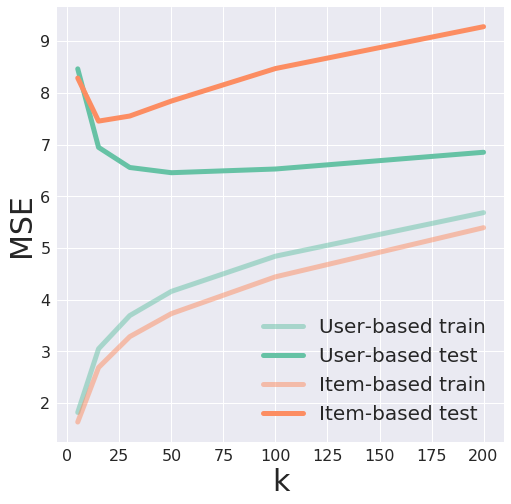

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_mse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_mse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MSE', fontsize=30);

### 4.6 Bias-subtracted Collaborative Filtering

针对问题的修正，对所有用户减掉他们的均值，可以让评分是以原点为中心的

![](../picture/4.png)

In [30]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
        pred += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred += item_bias[np.newaxis, :]
        
    return pred

In [31]:
user_pred = predict_nobias(train, user_similarity, kind='user')
print('Bias-subtracted User-based CF MSE: ' + str(get_mse(user_pred, test)))

item_pred = predict_nobias(train, item_similarity, kind='item')
print('Bias-subtracted Item-based CF MSE: ' + str(get_mse(item_pred, test)))

Bias-subtracted User-based CF MSE: 8.694025977636713
Bias-subtracted Item-based CF MSE: 9.708062309579937


### 4.7 All together now

In [32]:
def predict_topk_nobias(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
        pred += user_bias[:, np.newaxis]
    if kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items])) 
        pred += item_bias[np.newaxis, :]
        
    return pred

In [33]:
k_array = [5, 15, 30, 50, 100, 200]
user_train_mse = []
user_test_mse = []
item_test_mse = []
item_train_mse = []

for k in k_array:
    user_pred = predict_topk_nobias(train, user_similarity, kind='user', k=k)
    item_pred = predict_topk_nobias(train, item_similarity, kind='item', k=k)
    
    user_train_mse += [get_mse(user_pred, train)]
    user_test_mse += [get_mse(user_pred, test)]
    
    item_train_mse += [get_mse(item_pred, train)]
    item_test_mse += [get_mse(item_pred, test)]  

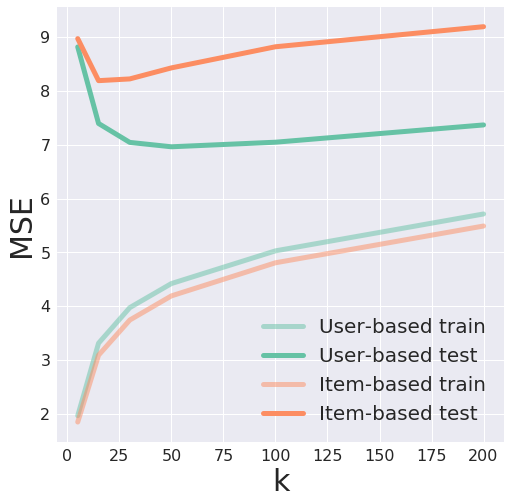

In [34]:
pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_mse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_mse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MSE', fontsize=30);